In [1]:
!pip install plotly

# Cryptocurrency Clusters

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [3]:
# Read in the data
df=pd.read_csv('crypto_data.csv')
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# Filter the DF to only the currency that is currently being traded. 
IsTrading_df=df[df['IsTrading']==True]
IsTrading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
# Now that IsTrading is all true, that column is no longer necessary. Drop it and Unnamed: 0. 
IsTrading_df=IsTrading_df.drop('IsTrading', 1).drop('Unnamed: 0', 1)
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Check how many NAN values there are. 
IsTrading_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [7]:
# Drop the NAN values. 
IsTrading_df=IsTrading_df.dropna()
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Filter the DF to only the currency being mined. 
IsTrading_df = IsTrading_df[IsTrading_df['TotalCoinsMined'] > 0]
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Save the CoinName column before dropping it. 
CoinName=pd.DataFrame(IsTrading_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [10]:
# Drop CoinName column. 
IsTrading_df=IsTrading_df.drop('CoinName', 1)
IsTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [11]:
# One-Hot encoding on Algorithm and Prooftype columns
IsTrading_df = pd.get_dummies(data=IsTrading_df, columns=['Algorithm', 'ProofType'])
IsTrading_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# # Rather than using dummy variables I am using Label Encoding to convert to numeric. 
# ColumnsToBeEncoded=['Algorithm', 'ProofType']
# for column in ColumnsToBeEncoded:
#     le=LabelEncoder()
#     IsTrading_df[column] = le.fit_transform(IsTrading_df[column].values)
# IsTrading_df

In [13]:
# Standardize the data using StandardScaler. 
scaler = StandardScaler()
scaled_IsTrading = scaler.fit_transform(IsTrading_df)
print(scaled_IsTrading[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

# Dimensionality Reduction

In [14]:
# Applying PCA to reduce dimensions to 90% of the explained variance. 

# Initialize PCA model
pca =PCA(n_components=0.90)

# Get principal components of the data. 
crypto_pca = pca.fit_transform(scaled_IsTrading)
crypto_pca.shape

(532, 74)

In [15]:
# Transform PCA data to a DataFrame
column_names = [f'PC {i}'for i in range(1, 75)]
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=column_names, index=IsTrading_df.index
)
df_crypto_pca.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 65,PC 66,PC 67,PC 68,PC 69,PC 70,PC 71,PC 72,PC 73,PC 74
0,-0.335099,1.032189,-0.590713,0.001397,-1.540297e-14,-1.165476e-11,1.934877e-14,-0.007129,-1.319756,-0.051813,...,6.791870e-16,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16
2,-0.318434,1.032331,-0.591126,0.001386,-1.523083e-14,-1.155975e-11,1.954039e-14,-0.007739,-1.322514,-0.056674,...,-4.586593e-16,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18
5,2.305468,1.656383,-0.683617,0.004731,-1.497294e-14,-3.949449e-11,3.772165e-14,-0.054781,-1.542879,-0.943951,...,1.780031e-14,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14
7,-0.145184,-1.320593,0.192813,-0.001229,3.693199e-15,1.025361e-11,-8.871203e-15,-0.002071,0.281463,0.251862,...,1.280944e-15,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14
8,-0.151768,-2.036192,0.396182,-0.001705,1.570991e-14,1.423168e-11,-1.220895e-14,0.027735,0.519099,0.188820,...,-6.092554e-16,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13


In [16]:
# Fetch the explained variance.
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [17]:
# Perform t-SNE on the PCA data
tsne = TSNE(learning_rate = 100)
transformed_crypto = tsne.fit_transform(crypto_pca)
transformed_crypto[0]

array([ 0.4736296, 14.896357 ], dtype=float32)

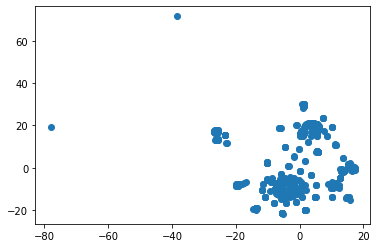

In [18]:
# Create scatter plot from t-SNE data
x = transformed_crypto[:,0]
y = transformed_crypto[:,1]
plt.scatter(x, y)
plt.show()

# Cluster Analysis with K-Means

In [19]:
# Identify best number of clusters using elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_crypto)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



,k,inertia
0,1,185540.015625
1,2,98391.054688
2,3,64714.132812
3,4,33009.355469
4,5,27863.181641


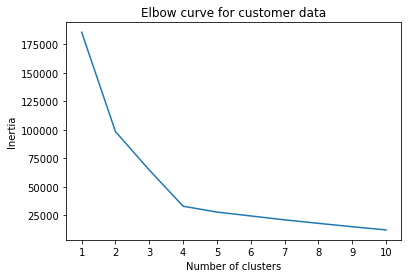

In [20]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

## Conclusion:
### Based on this model the cryptocurrency can be clustered into 4 clusters. 

# Which Cryptocurrencies can be clustered together?

### I think it is important to answer this question because the above information makes little sense to a human, especially one with very little or no machine learning and data analysis background. 

In [21]:
transform_crypto_df=pd.DataFrame(transformed_crypto).reset_index(drop=True)
transform_crypto_df

,0,1
0,0.473630,14.896357
1,6.145558,19.286110
2,1.082699,28.389454
3,-26.852539,17.593563
4,-5.434630,-21.556215
...,...,...
527,-23.237803,11.942147
528,2.864094,20.671871
529,-19.676411,-7.724032
530,-13.556031,-19.164457


In [22]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(transformed_crypto)

# Predict clusters
predictions = model.predict(transformed_crypto)

# Add class column to the DF
transform_crypto_df['class']=model.labels_

predictions

array([0, 0, 0, 2, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 3, 0, 1, 3, 0, 0, 3, 3,
       2, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 2, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 0, 1, 3, 1, 2, 3, 3, 3, 0, 3, 3, 1, 3, 2, 1, 0, 3,
       2, 3, 0, 3, 0, 0, 0, 3, 3, 3, 1, 1, 2, 3, 2, 0, 1, 2, 2, 2, 1, 0,
       0, 3, 3, 1, 3, 1, 3, 2, 0, 0, 3, 3, 3, 1, 3, 2, 0, 3, 1, 3, 0, 3,
       1, 3, 0, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 2, 3, 1, 0, 1, 3, 2, 0,
       1, 1, 3, 3, 1, 3, 0, 3, 2, 0, 1, 2, 1, 3, 3, 2, 1, 3, 2, 2, 0, 0,
       1, 1, 3, 3, 3, 1, 1, 2, 3, 1, 3, 1, 1, 2, 2, 0, 1, 3, 1, 0, 0, 0,
       0, 1, 1, 3, 1, 0, 3, 2, 2, 1, 0, 3, 0, 3, 1, 2, 3, 3, 0, 1, 0, 1,
       3, 1, 0, 0, 1, 0, 3, 3, 1, 1, 3, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0,
       2, 0, 0, 1, 3, 0, 1, 0, 0, 0, 3, 3, 3, 3, 0, 2, 1, 0, 1, 0, 3, 1,
       3, 3, 0, 1, 3, 0, 3, 3, 1, 3, 1, 0, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0,
       2, 1, 3, 1, 2, 1, 0, 0, 2, 3, 1, 3, 0, 3, 3, 3, 3, 0, 1, 0, 0, 3,
       0, 3, 1, 1, 0, 3, 0, 3, 3, 0, 1, 1, 0, 2, 1,

In [23]:
transform_crypto_df

,0,1,class
0,0.473630,14.896357,0
1,6.145558,19.286110,0
2,1.082699,28.389454,0
3,-26.852539,17.593563,2
4,-5.434630,-21.556215,3
...,...,...,...
527,-23.237803,11.942147,2
528,2.864094,20.671871,0
529,-19.676411,-7.724032,3
530,-13.556031,-19.164457,3


In [24]:
# Create a new DF which concats the Transformed_Crypto (t-SNE) with the CoinNames and a final column called Class which will indicate which cluster each cryptocurrency is a part of. 
clustered_df=pd.concat([CoinName, transform_crypto_df],axis=1, sort=False)
# clustered_df=CoinName_df.join(transform_crypto_df, how='outer')
print(clustered_df.shape)
clustered_df

(532, 4)


,CoinName,0,1,class
0,42 Coin,0.473630,14.896357,0
1,404Coin,6.145558,19.286110,0
2,EliteCoin,1.082699,28.389454,0
3,Bitcoin,-26.852539,17.593563,2
4,Ethereum,-5.434630,-21.556215,3
...,...,...,...,...
527,ZEPHYR,-23.237803,11.942147,2
528,Gapcoin,2.864094,20.671871,0
529,Beldex,-19.676411,-7.724032,3
530,Horizen,-13.556031,-19.164457,3


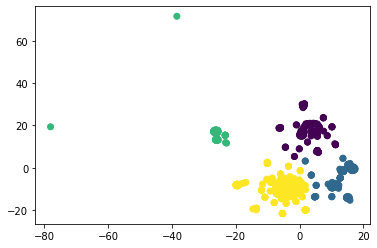

In [25]:
plt.scatter(clustered_df[0], clustered_df[1], c=clustered_df['class'])
plt.show()

In [26]:
for i in range(0,4):
    cluster=clustered_df[clustered_df['class']==i]
    cluster.to_csv(f"portfolio_options/cryptocurrencyPortfolio{i}.csv")


## My Suggestion to the Client:

### The cryptocurrency portfolio offerings should be clustered according to the included CSV files. 